#  實作簡單的 neural network

## 1. cross entropy

在神經網路常常被拿來當作 loss function。 

$$
E = -\Sigma_k l_k \log y_k
$$

其中 l 為輸出的標籤，y 為輸出結果

In [1]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
    batch_size = y.shape[0]
    return -np.sum(t * np.log(y)) / batch_size


In [2]:
import numpy as np
import sys, os
sys.path.append(os.pardir)
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from mpl_toolkits.mplot3d import Axes3D
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

In [3]:
# see how the trainset and label look like.
print(x_train.shape[0])
print(t_train[0:10])

60000
[[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]]


### 批次處理資料

In [4]:
train_size = x_train.shape[0]
batch_size = 100
random_indices = np.random.choice(train_size, batch_size)

def random_data_set(x, labels, indices):
    return x[indices], labels[indices]

x_batch, t_batch = random_data_set(x_train, t_train, random_indices)


## 梯度

0.1999999999990898


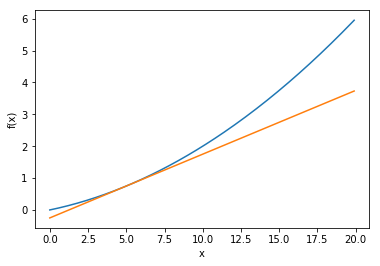

In [5]:
def numerical_diff(f, x):
    h = 1e-4 # 0.0001
    return (f(x+h) - f(x-h)) / (2*h)


def function_1(x):
    return 0.01*x**2 + 0.1*x 


def tangent_line(f, x):
    d = numerical_diff(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y
     
x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")

tf = tangent_line(function_1, 5)
y2 = tf(x)

plt.plot(x, y)
plt.plot(x, y2)
plt.show()

In [6]:
x0 = np.arange(-2, 2.5, 0.25)
x1 = np.arange(-2, 2.5, 0.25)
fig = plt.figure()
ax = Axes3D(fig)

# X, Y value
X, Y = np.meshgrid(x0, x1)
def fn(x0, x1):
    return np.sum([[x**2 for x in x0], [x**2 for x in x1]], axis=0)

ax.plot_wireframe(X, Y, fn(x0, x1), rstride=1, cstride=1)
ax.set_xlabel('x1', labelpad=10, fontsize=24, fontweight='bold')
ax.set_ylabel('x2', labelpad=10, fontsize=24, fontweight='bold')
ax.set_zlabel('f(x1,x2)', labelpad=5, fontsize=24, fontweight='bold')
R = fn(x0, x1)

plt.show()

In [7]:
def _numerical_gradient_no_batch(f, x):
    h = 1e-4  # 0.0001
    grad = np.zeros_like(x)
    
    for idx in range(x.size):
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x)
        
        x[idx] = tmp_val - h 
        fxh2 = f(x)
        grad[idx] = (fxh1 - fxh2) / (2*h)
        
        x[idx] = tmp_val
        
    return grad


def numerical_gradient(f, X):
    if X.ndim == 1:
        return _numerical_gradient_no_batch(f, X)
    else:
        grad = np.zeros_like(X)
        
        for idx, x in enumerate(X):
            grad[idx] = _numerical_gradient_no_batch(f, x)
        
        return grad


def function_2(x):
    if x.ndim == 1:
        return np.sum(x**2)
    else:
        return np.sum(x**2, axis=1)


x0 = np.arange(-2, 2.5, 0.25)
x1 = np.arange(-2, 2.5, 0.25)
X, Y = np.meshgrid(x0, x1)

X = X.flatten()
Y = Y.flatten()

grad = numerical_gradient(function_2, np.array([X, Y]))
plt.figure()
plt.quiver(X, Y, -grad[0], -grad[1], angles="xy", color="#000000")
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.xlabel('x0')
plt.ylabel('x1')
plt.grid()
plt.show()